In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from estimate_direct_demand import get_household_size_buckets, get_under_6_full_poverty_levels

In [2]:
POVERTY_CSV = 'poverty_levels.csv'
OEC_SMI = 'oec_smi_data.csv'

In [3]:
oec_df = pd.read_csv(OEC_SMI)

In [4]:
oec_df['SMI_75_percent'] = oec_df['SMI_50_percent'] * 1.5
oec_df['SMI_75_percent_vs_poverty'] = oec_df['SMI_75_percent'] / oec_df['poverty_level']

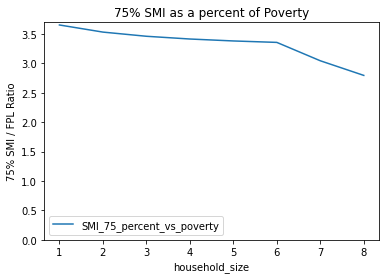

In [5]:
oec_df.plot(kind='line', x='household_size', y='SMI_75_percent_vs_poverty')
plt.ylim(0)
plt.title('75% SMI as a percent of Poverty')
plt.ylabel('75% SMI / FPL Ratio')
plt.show()

In [79]:
raw_household_size_df = get_household_size_buckets()
poverty_under_6_state, raw_poverty_under_6_towns = get_under_6_full_poverty_levels()

In [33]:
household_size_df = raw_household_size_df.rename_axis('household_size').reset_index()
household_size_df['household_size'] = household_size_df['household_size'].astype(int)

In [44]:
# Get population by household size
household_size_df['adjusted_household_population'] = household_size_df['household_size'].astype(int) * household_size_df['num_households']

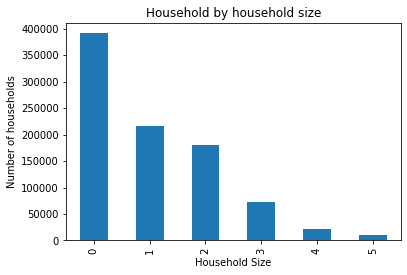

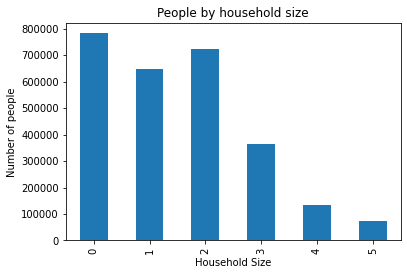

In [35]:
household_size_df['num_households'].plot(kind='bar', legend=None)
plt.ylabel('Number of households')
plt.xlabel('Household Size')
plt.title('Household by household size')
plt.show()

household_size_df['adjusted_household_size'].plot(kind='bar', legend=None)
plt.ylabel('Number of people')
plt.xlabel('Household Size')
plt.title('People by household size')
plt.show()

In [36]:
household_size_df.dtypes

household_size             int64
num_households             int64
adjusted_household_size    int64
dtype: object

In [46]:
# Join household size by population to dataframe with poverty and SMI levels
merged_df = household_size_df.merge(oec_df, left_on='household_size', right_on='household_size')

In [47]:
merged_df

,household_size,num_households,adjusted_household_size,adjusted_household_population,poverty_level,SMI_50_percent,SMI_75_percent,SMI_75_percent_vs_poverty
0,2,391446,782892,782892,17420,41023.04,61534.56,3.532409
1,3,215445,646335,646335,21960,50675.52,76013.28,3.461443
2,4,180510,722040,722040,26500,60328.00,90492.00,3.414792
3,5,72942,364710,364710,31040,69980.48,104970.72,3.381789
4,6,22357,134142,134142,35580,79632.96,119449.44,3.357207
5,7,10738,75166,75166,40120,81442.80,122164.20,3.044970


In [48]:
weighted_average = np.average(merged_df.SMI_75_percent_vs_poverty, weights=merged_df.adjusted_household_population)

In [49]:
print(weighted_average)

3.442192531771611


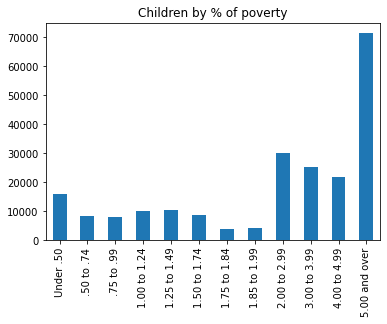

In [72]:
poverty_under_6_state.T.rename(columns=lambda x: 'children').plot(kind='bar', legend=None)
plt.title('Children by % of poverty')
plt.show()